In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
!unzip trashnet.zip -d dataset

unzip:  cannot find or open trashnet.zip, trashnet.zip.zip or trashnet.zip.ZIP.


In [4]:
!ls

archive.zip  sample_data


In [5]:
!unzip archive.zip -d dataset


Archive:  archive.zip
  inflating: dataset/dataset-resized/cardboard/cardboard1.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard10.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard100.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard101.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard102.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard103.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard104.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard105.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard106.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard107.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard108.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard109.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard11.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard110.jpg  
  inflating: dataset/dataset-resized/cardboard/cardboard11

In [6]:
!ls dataset

dataset-resized


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalizing (rescale pixel values) + split for validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data
train_gen = datagen.flow_from_directory(
    'dataset/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_gen = datagen.flow_from_directory(
    'dataset/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(128,128,3)),   # Explicit input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - accuracy: 0.2264 - loss: 1.9418 - val_accuracy: 0.3340 - val_loss: 1.5975
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.4531 - loss: 1.3923 - val_accuracy: 0.4195 - val_loss: 1.4762
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5297 - loss: 1.2123 - val_accuracy: 0.4533 - val_loss: 1.4694
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5831 - loss: 1.1137 - val_accuracy: 0.4533 - val_loss: 1.3704
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6413 - loss: 0.9594 - val_accuracy: 0.4990 - val_loss: 1.4428
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7287 - loss: 0.7294 - val_accuracy: 0.4990 - val_loss: 1.3426
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7707 - loss: 0.6368 - val_accuracy: 0.5050 - val_loss: 1.4045
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7889 - loss: 0.5480 - val_accuracy: 0.5348 -

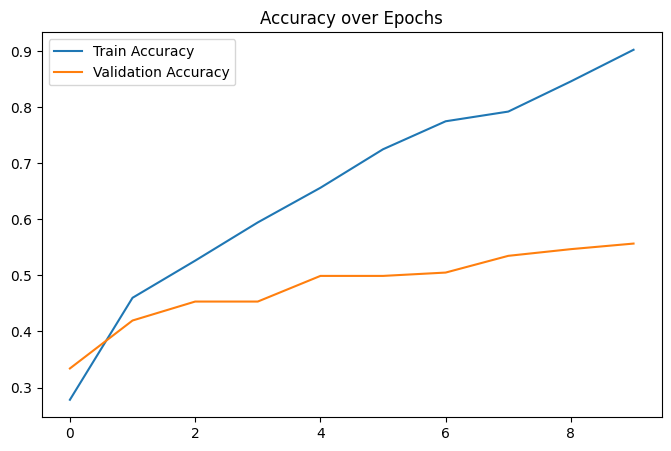

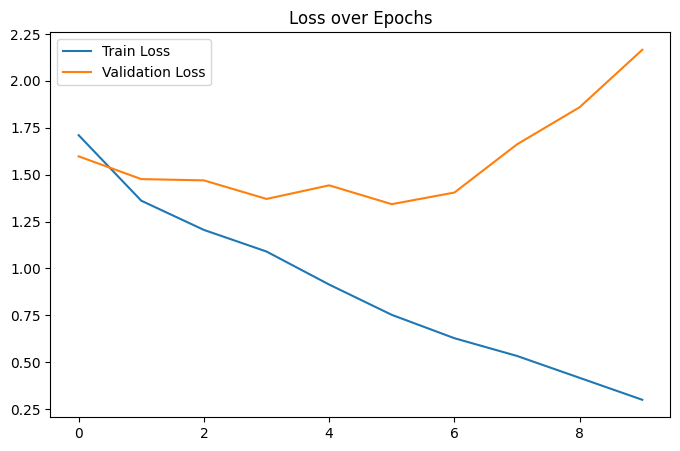

In [12]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

In [15]:
from google.colab import files
uploaded = files.upload()  # Upload a sample image from your laptop

Saving plastic1.jpg to plastic1.jpg


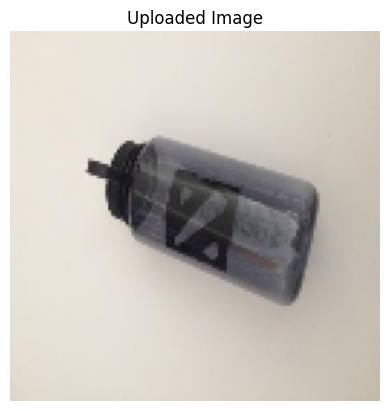

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🤖 Predicted Class: paper


In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Get uploaded image filename
img_path = list(uploaded.keys())[0]

# Show the uploaded image
img = image.load_img(img_path, target_size=(128,128))
plt.imshow(img)
plt.title("Uploaded Image")
plt.axis('off')
plt.show()

# Preprocess image
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict class
pred = model.predict(img_array)
class_names = list(train_gen.class_indices.keys())
predicted_class = class_names[np.argmax(pred)]

print("🤖 Predicted Class:", predicted_class)

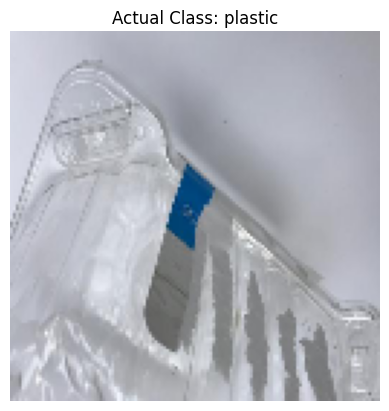

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ Actual Class: plastic
🤖 Predicted Class: plastic


In [17]:
import random, os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Pick a random class folder (like plastic, paper, etc.)
random_class = random.choice(os.listdir("dataset/dataset-resized"))
class_folder = os.path.join("dataset/dataset-resized", random_class)

# Pick a random image from that folder
random_img = random.choice(os.listdir(class_folder))
img_path = os.path.join(class_folder, random_img)

# Show the image
img = image.load_img(img_path, target_size=(128,128))
plt.imshow(img)
plt.title(f"Actual Class: {random_class}")
plt.axis('off')
plt.show()

# Preprocess the image for the model
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict class
pred = model.predict(img_array)
class_names = list(train_gen.class_indices.keys())
predicted_class = class_names[np.argmax(pred)]

print("✅ Actual Class:", random_class)
print("🤖 Predicted Class:", predicted_class)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augment the dataset to prevent overfitting
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,          # randomly rotate images
    width_shift_range=0.2,      # shift horizontally
    height_shift_range=0.2,     # shift vertically
    zoom_range=0.2,             # random zoom
    horizontal_flip=True        # flip images horizontally
)

train_gen = datagen.flow_from_directory(
    'dataset/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'dataset/dataset-resized',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [19]:
history = model.fit(
    train_gen,
    epochs=20,            # was 10 before
    validation_data=val_gen
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.5494 - loss: 1.4012 - val_accuracy: 0.4930 - val_loss: 1.3499
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.6094 - loss: 1.0459 - val_accuracy: 0.5070 - val_loss: 1.3379
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - accuracy: 0.6418 - loss: 0.9598 - val_accuracy: 0.5268 - val_loss: 1.2180
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.6225 - loss: 0.9897 - val_accuracy: 0.5308 - val_loss: 1.2057
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.6794 - loss: 0.8682 - val_accuracy: 0.5229 - val_loss: 1.2644
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - accuracy: 0.6541 - loss: 0.9314 - val_accuracy: 0.5388 - val_loss: 1.2422
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - accuracy: 0.6699 - loss: 0.8816 - val_accuracy: 0.5666 - val_loss: 1.2038
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - accuracy: 0.7163 - loss: 0.7998 - val_accu

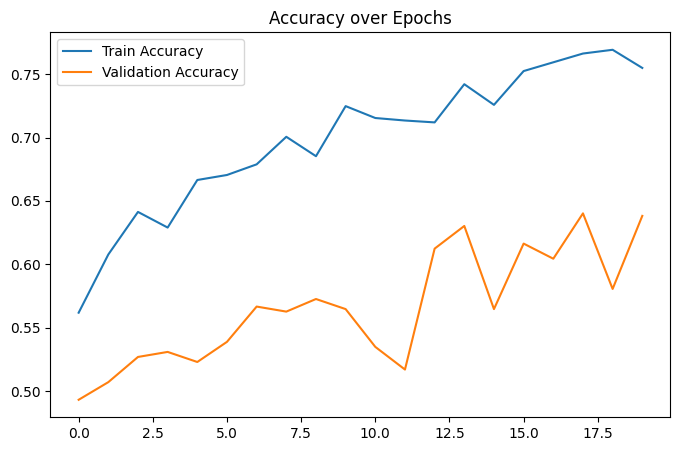

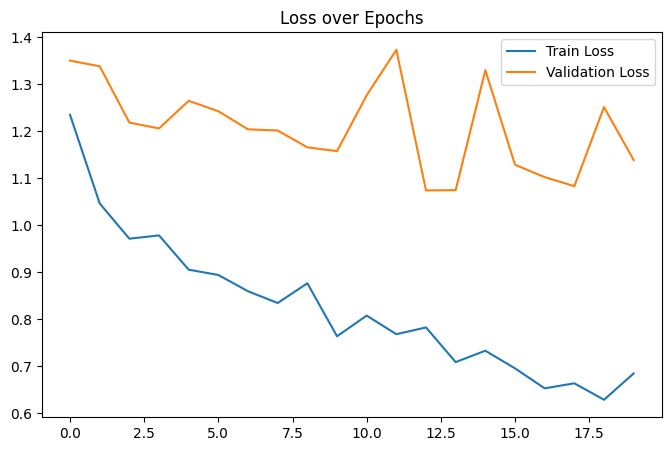

In [20]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

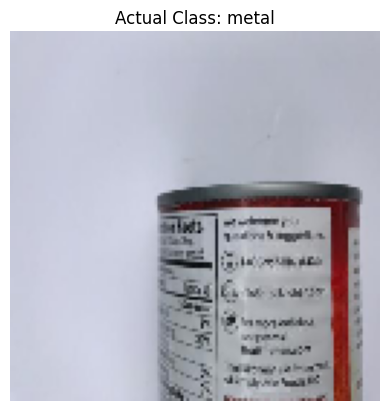

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
✅ Actual Class: metal
🤖 Predicted Class: metal


In [21]:
import random, os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Pick a random class folder (like plastic, paper, etc.)
random_class = random.choice(os.listdir("dataset/dataset-resized"))
class_folder = os.path.join("dataset/dataset-resized", random_class)

# Pick a random image from that folder
random_img = random.choice(os.listdir(class_folder))
img_path = os.path.join(class_folder, random_img)

# Show the image
img = image.load_img(img_path, target_size=(128,128))
plt.imshow(img)
plt.title(f"Actual Class: {random_class}")
plt.axis('off')
plt.show()

# Preprocess the image for the model
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict class
pred = model.predict(img_array)
class_names = list(train_gen.class_indices.keys())
predicted_class = class_names[np.argmax(pred)]

print("✅ Actual Class:", random_class)
print("🤖 Predicted Class:", predicted_class)

In [22]:
# ✅ Save the improved model
model.save("waste_model_improved.h5")

# ✅ Download to your laptop
from google.colab import files
files.download("waste_model_improved.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
model.save("waste_model_improved.keras")
from google.colab import files
files.download("waste_model_improved.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>